In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [67]:
df = pd.read_csv('NSE All Share Historical Data.csv')

In [68]:
df.shape

(2897, 8)

In [69]:
df.head()

,Date,Price,Open,High,Low,Vol.,Volume,Change %
0,2023-10-12,"67,111.03","67,100.49","67,111.03","67,100.49",6.76M,6760000,0.02%
1,2023-10-11,"67,100.49","66,984.32","67,190.54","66,981.09",410.32M,410320000,0.17%
2,2023-10-10,"66,984.62","67,101.39","67,118.93","66,956.31",257.42M,257420000,-0.17%
3,2023-10-09,"67,101.57","66,454.57","67,123.22","66,454.57",268.65M,268650000,0.97%
4,2023-10-06,"66,454.57","66,532.84","67,188.68","66,210.45",374.09M,374090000,-0.17%


In [70]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Volume,Change %
count,2897,2897,2897,2897,2897,1600,2897,2897
unique,2897,2888,2887,2881,2887,1564,1565,499
top,2023-10-12,"22,109.76","20,658.28","37,259.65","37,278.34",1.17B,#VALUE!,0.02%
freq,1,2,3,4,3,3,1297,34


In [71]:
df.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1297
Volume         0
Change %       0
dtype: int64

In [72]:
df.replace(',', '', regex=True)

,Date,Price,Open,High,Low,Vol.,Volume,Change %
0,2023-10-12,67111.03,67100.49,67111.03,67100.49,6.76M,6760000,0.02%
1,2023-10-11,67100.49,66984.32,67190.54,66981.09,410.32M,410320000,0.17%
2,2023-10-10,66984.62,67101.39,67118.93,66956.31,257.42M,257420000,-0.17%
3,2023-10-09,67101.57,66454.57,67123.22,66454.57,268.65M,268650000,0.97%
4,2023-10-06,66454.57,66532.84,67188.68,66210.45,374.09M,374090000,-0.17%
...,...,...,...,...,...,...,...,...
2892,2012-02-03,20877.64,20822.00,20863.93,20786.35,NaN,#VALUE!,0.27%
2893,2012-02-02,20822.00,20872.94,20900.58,20785.40,NaN,#VALUE!,0.15%
2894,2012-02-01,20790.88,20875.34,20941.03,20790.88,NaN,#VALUE!,-0.41%
2895,2012-01-31,20875.83,20818.56,21009.92,20789.48,NaN,#VALUE!,0.70%


In [73]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


In [74]:
df['Date']

0      2023-10-12
1      2023-10-11
2      2023-10-10
3      2023-10-09
4      2023-10-06
          ...    
2892   2012-02-03
2893   2012-02-02
2894   2012-02-01
2895   2012-01-31
2896   2012-01-30
Name: Date, Length: 2897, dtype: datetime64[ns]

In [75]:
print(df.dtypes)

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Volume              object
Change %            object
dtype: object


In [76]:
df.head()

,Date,Price,Open,High,Low,Vol.,Volume,Change %
0,2023-10-12,"67,111.03","67,100.49","67,111.03","67,100.49",6.76M,6760000,0.02%
1,2023-10-11,"67,100.49","66,984.32","67,190.54","66,981.09",410.32M,410320000,0.17%
2,2023-10-10,"66,984.62","67,101.39","67,118.93","66,956.31",257.42M,257420000,-0.17%
3,2023-10-09,"67,101.57","66,454.57","67,123.22","66,454.57",268.65M,268650000,0.97%
4,2023-10-06,"66,454.57","66,532.84","67,188.68","66,210.45",374.09M,374090000,-0.17%


In [77]:
df['Vol.'].fillna(method='bfill', inplace=True)

df['Vol.'] = df['Vol.'].str.replace('M', 'e6').str.replace('B', 'e9').astype(float)


C:\Users\dell 5590 i7\AppData\Local\Temp\ipykernel_17180\4221453797.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vol.'].fillna(method='bfill', inplace=True)


In [78]:
df.drop(columns=['Change %', 'Volume'], inplace=True)


In [79]:
# List of columns to convert to float
columns_to_convert = ['Price', 'Open', 'High', 'Low',]

# Convert the specified columns to float
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', '', regex=True), errors='coerce', downcast='float'))


In [80]:
df.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.            float64
dtype: object

In [81]:
df.isnull().sum()

Date       0
Price      0
Open       0
High       0
Low        0
Vol.     905
dtype: int64

In [82]:
df['Vol.'].fillna(method='ffill', inplace=True)

C:\Users\dell 5590 i7\AppData\Local\Temp\ipykernel_17180\2546488070.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vol.'].fillna(method='ffill', inplace=True)


In [83]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
Vol.     0
dtype: int64

C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: Futur

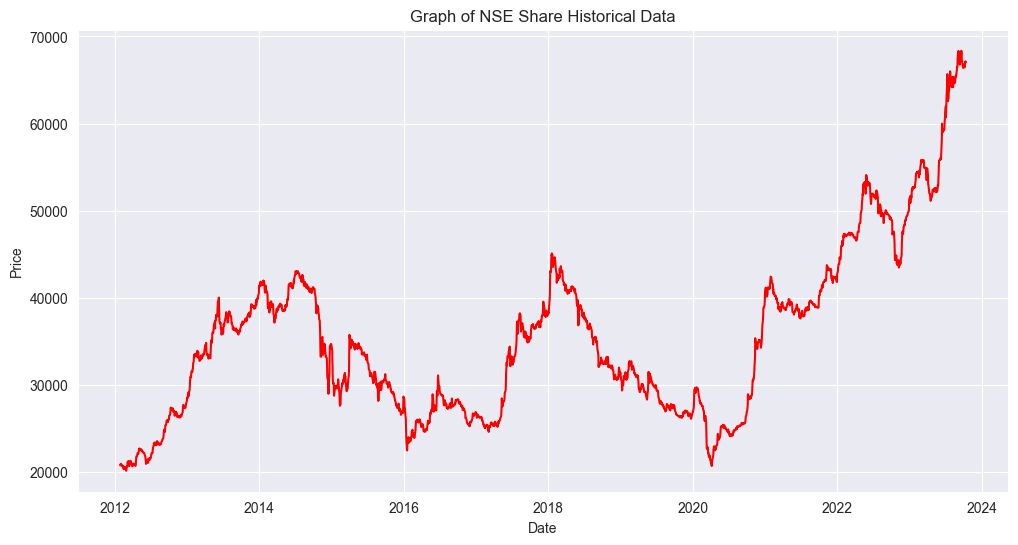

In [84]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Graph of NSE Share Historical Data')
plt.show()

C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: Futur

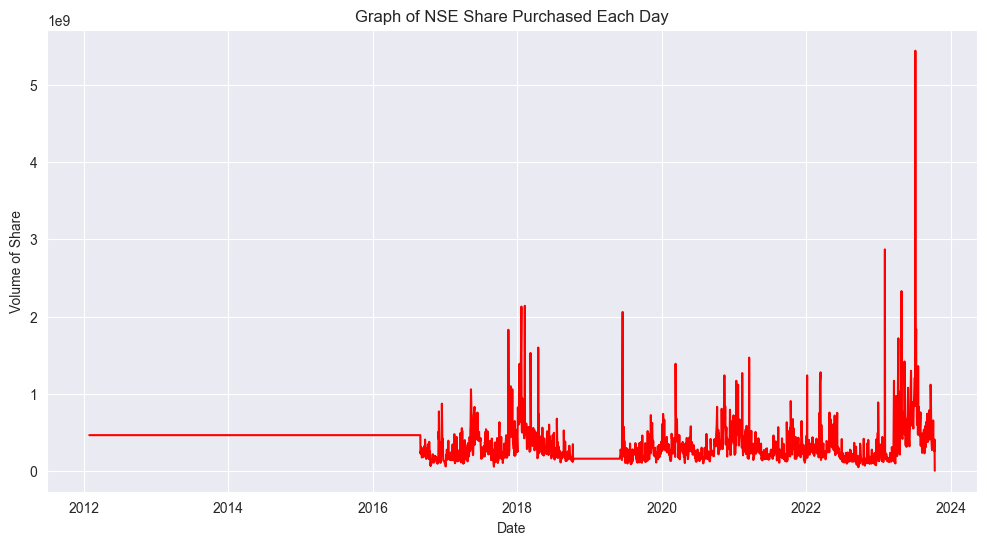

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Vol.', color='red')
plt.xlabel('Date')
plt.ylabel('Volume of Share')
plt.title('Graph of NSE Share Purchased Each Day')
plt.show()

In [86]:
top_20_prices = df.sort_values(by='Price', ascending=False).head(20)
print(top_20_prices[['Date', 'Price', 'Vol.']])


         Date     Price          Vol.
15 2023-09-19  68359.22  6.767400e+08
14 2023-09-20  68335.72  5.666300e+08
25 2023-09-05  68334.68  5.578000e+08
24 2023-09-06  68286.28  3.786500e+08
26 2023-09-04  68279.14  7.447600e+08
13 2023-09-21  68271.14  1.120000e+09
22 2023-09-08  68143.34  4.834900e+08
23 2023-09-07  68082.11  3.780900e+08
16 2023-09-18  67877.17  5.152800e+08
27 2023-09-01  67527.19  5.037500e+08
19 2023-09-13  67414.40  5.696300e+08
17 2023-09-15  67395.74  4.088700e+08
18 2023-09-14  67347.73  7.885400e+08
12 2023-09-22  67324.59  1.030000e+09
21 2023-09-11  67296.18  5.201300e+08
0  2023-10-12  67111.03  6.760000e+06
3  2023-10-09  67101.57  2.686500e+08
1  2023-10-11  67100.49  4.103200e+08
2  2023-10-10  66984.62  2.574200e+08
11 2023-09-25  66882.64  4.081900e+08


In [87]:
top_20_Volume = df.sort_values(by='Vol.', ascending=False).head(20)
print(top_20_Volume[['Date', 'Price', 'Vol.']])

           Date     Price          Vol.
68   2023-07-06  62019.88  5.440000e+09
169  2023-02-02  53998.12  2.870000e+09
113  2023-04-27  52235.88  2.330000e+09
1404 2018-02-08  43326.89  2.140000e+09
1417 2018-01-22  44912.53  2.130000e+09
1072 2019-06-17  29936.33  2.060000e+09
1071 2019-06-18  29818.80  2.060000e+09
66   2023-07-10  64603.69  1.840000e+09
1459 2017-11-17  36703.58  1.830000e+09
123  2023-04-11  51952.99  1.720000e+09
1358 2018-04-17  40788.68  1.600000e+09
1383 2018-03-09  43167.86  1.530000e+09
114  2023-04-26  52097.62  1.480000e+09
634  2021-03-18  38914.84  1.470000e+09
103  2023-05-12  52214.62  1.420000e+09
1423 2018-01-12  42898.90  1.390000e+09
887  2020-03-11  23572.75  1.390000e+09
58   2023-07-20  63930.72  1.360000e+09
1418 2018-01-19  45092.83  1.340000e+09
1419 2018-01-18  44848.74  1.340000e+09


In [88]:
bottom_20_prices = df.sort_values(by='Price', ascending=True).head(20)
print(bottom_20_prices[['Date', 'Price', 'Vol.']])


           Date     Price         Vol.
2875 2012-02-29  20123.51  466940000.0
2876 2012-02-28  20137.51  466940000.0
2874 2012-03-01  20193.40  466940000.0
2880 2012-02-22  20313.36  466940000.0
2884 2012-02-16  20314.08  466940000.0
2885 2012-02-15  20329.62  466940000.0
2877 2012-02-27  20364.55  466940000.0
2883 2012-02-17  20411.17  466940000.0
2879 2012-02-23  20426.21  466940000.0
2882 2012-02-20  20439.25  466940000.0
2881 2012-02-21  20492.31  466940000.0
2878 2012-02-24  20495.92  466940000.0
2887 2012-02-13  20583.61  466940000.0
2873 2012-03-02  20592.01  466940000.0
2872 2012-03-05  20619.05  466940000.0
2888 2012-02-10  20623.63  466940000.0
2889 2012-02-09  20631.38  466940000.0
2852 2012-04-02  20650.95  466940000.0
2853 2012-03-30  20652.47  466940000.0
2864 2012-03-15  20658.28  466940000.0


In [89]:
bottom_20_Volume = df.sort_values(by='Vol.', ascending=True).head(20)
print(bottom_20_Volume[['Date', 'Price', 'Vol.']])

           Date     Price        Vol.
0    2023-10-12  67111.03   6760000.0
260  2022-09-21  49421.91  51880000.0
1511 2017-09-05  35403.92  59500000.0
1677 2017-01-04  26495.04  62090000.0
262  2022-09-19  49440.21  67370000.0
1726 2016-10-21  27596.82  70940000.0
239  2022-10-24  44461.63  72320000.0
1728 2016-10-19  27478.04  75010000.0
199  2022-12-19  49414.96  76740000.0
246  2022-10-13  47524.38  86540000.0
267  2022-09-12  49626.05  86590000.0
202  2022-12-14  48988.04  88020000.0
1042 2019-07-29  27950.36  92790000.0
237  2022-10-26  44859.78  93510000.0
240  2022-10-21  44396.73  95080000.0
1702 2016-11-24  25490.70  97140000.0
1039 2019-08-01  27748.46  97360000.0
1614 2017-04-03  25273.03  97690000.0
221  2022-11-17  44011.22  97700000.0
302  2022-07-25  51400.53  98750000.0


In [90]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample the data to yearly frequency, calculating the mean for 'Price' and 'Vol.'
yearly_avg = df.resample('Y').mean()

# Reset the index to make 'Date' a regular column
yearly_avg.reset_index(inplace=True)

# Print the table
print(yearly_avg[['Date', 'Price', 'Vol.']])

         Date         Price          Vol.
0  2012-12-31  23434.316245  4.669400e+08
1  2013-12-31  35826.621538  4.669400e+08
2  2014-12-31  39258.733750  4.669400e+08
3  2015-12-31  30819.451984  4.669400e+08
4  2016-12-31  26549.630972  3.852964e+08
5  2017-12-31  31775.304656  3.215980e+08
6  2018-12-31  37407.520726  3.527060e+08
7  2019-12-31  28859.278704  2.242250e+08
8  2020-12-31  27114.844217  3.402223e+08
9  2021-12-31  40035.034758  3.253024e+08
10 2022-12-31  48549.354758  2.576106e+08
11 2023-12-31  58476.004583  5.136920e+08


In [91]:
df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2023-10-12,67111.03,67100.49,67111.03,67100.49,6760000.0
2023-10-11,67100.49,66984.32,67190.54,66981.09,410320000.0
2023-10-10,66984.62,67101.39,67118.93,66956.31,257420000.0
2023-10-09,67101.57,66454.57,67123.22,66454.57,268650000.0
2023-10-06,66454.57,66532.84,67188.68,66210.45,374090000.0


In [92]:
print(df)

               Price      Open      High       Low         Vol.
Date                                                           
2023-10-12  67111.03  67100.49  67111.03  67100.49    6760000.0
2023-10-11  67100.49  66984.32  67190.54  66981.09  410320000.0
2023-10-10  66984.62  67101.39  67118.93  66956.31  257420000.0
2023-10-09  67101.57  66454.57  67123.22  66454.57  268650000.0
2023-10-06  66454.57  66532.84  67188.68  66210.45  374090000.0
...              ...       ...       ...       ...          ...
2012-02-03  20877.64  20822.00  20863.93  20786.35  466940000.0
2012-02-02  20822.00  20872.94  20900.58  20785.40  466940000.0
2012-02-01  20790.88  20875.34  20941.03  20790.88  466940000.0
2012-01-31  20875.83  20818.56  21009.92  20789.48  466940000.0
2012-01-30  20731.72  20939.10  20950.02  20731.72  466940000.0

[2897 rows x 5 columns]


C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell 5590 i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: Futur

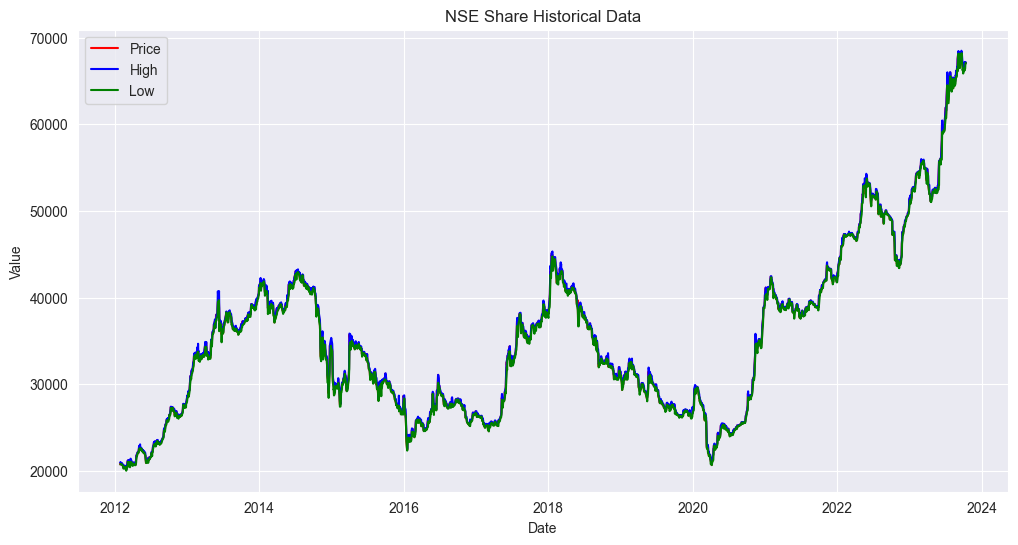

In [93]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))


sns.lineplot(data=df, x='Date', y='Price', color='red', label='Price')

sns.lineplot(data=df, x='Date', y='High', color='blue', label='High')

sns.lineplot(data=df, x='Date', y='Low', color='green', label='Low')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('NSE Share Historical Data')
plt.legend()
plt.show()







In [94]:
df.drop(columns=['Open', 'High', 'Low', 'Vol.'], inplace=True)

In [95]:
# Define the split index values
split_index1 = '2021-01-01'
split_index2 = '2022-07-01'

# Convert the index to a DateTimeIndex (if it's not already)
df.index = pd.to_datetime(df.index)

# Split the data into training, validation, and test sets
train_data = df[df.index < split_index1]
val_data = df[(df.index >= split_index1) & (df.index < split_index2)]
test_data = df[df.index >= split_index2]


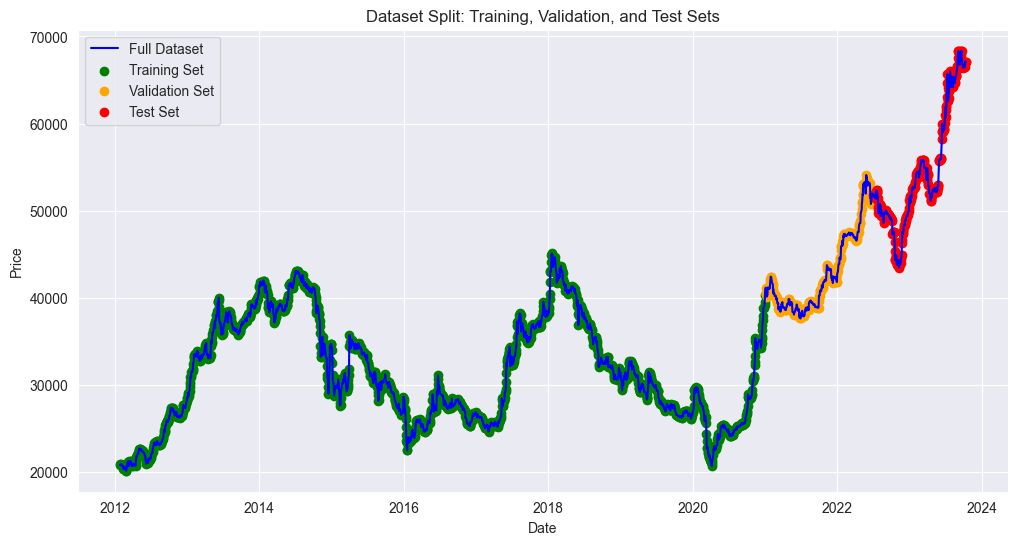

In [96]:


# Plot the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Full Dataset', color='blue')

# Plot the training, validation, and test sets
plt.scatter(train_data.index, train_data['Price'], label='Training Set', color='green', marker='o')
plt.scatter(val_data.index, val_data['Price'], label='Validation Set', color='orange', marker='o')
plt.scatter(test_data.index, test_data['Price'], label='Test Set', color='red', marker='o')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dataset Split: Training, Validation, and Test Sets')
plt.legend()

# Show the plot
plt.show()


In [97]:
train_data.shape

(2209, 1)

In [98]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training, validation, and test data 
train_scaled = scaler.fit_transform(train_data['Price'].values.reshape(-1, 1))
val_scaled = scaler.transform(val_data['Price'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['Price'].values.reshape(-1, 1))


In [99]:
train_scaled

array([[0.8068786 ],
       [0.77650493],
       [0.76039956],
       ...,
       [0.0267276 ],
       [0.03012978],
       [0.02435829]])

In [100]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [101]:
time_step = 20
X_train, y_train = create_dataset(train_scaled, time_step)
X_val, y_val = create_dataset(val_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [102]:
X_train.shape

(2188, 20)

In [103]:
y_train.shape

(2188,)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
features = 1
# Define the model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, features)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 20, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [107]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001

# Compile the model 
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [108]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=64,verbose=1, callbacks=[early_stopping])


Epoch 1/100
35/35 [==============================] - 8s 74ms/step - loss: 0.0253 - mae: 0.1224 - val_loss: 0.0201 - val_mae: 0.1045
Epoch 2/100
35/35 [==============================] - 2s 44ms/step - loss: 0.0046 - mae: 0.0532 - val_loss: 0.0198 - val_mae: 0.0911
Epoch 3/100
35/35 [==============================] - 2s 44ms/step - loss: 0.0039 - mae: 0.0494 - val_loss: 0.0184 - val_mae: 0.0895
Epoch 4/100
35/35 [==============================] - 2s 44ms/step - loss: 0.0035 - mae: 0.0461 - val_loss: 0.0154 - val_mae: 0.0801
Epoch 5/100
35/35 [==============================] - 2s 44ms/step - loss: 0.0033 - mae: 0.0445 - val_loss: 0.0149 - val_mae: 0.0852
Epoch 6/100
35/35 [==============================] - 2s 43ms/step - loss: 0.0029 - mae: 0.0414 - val_loss: 0.0111 - val_mae: 0.0690
Epoch 7/100
35/35 [==============================] - 1s 43ms/step - loss: 0.0025 - mae: 0.0379 - val_loss: 0.0107 - val_mae: 0.0695
Epoch 8/100
35/35 [==============================] - 1s 43ms/step - loss: 0.

In [109]:
test_loss, test_mae = model.evaluate(X_train, y_train)
print('Test Loss:', test_loss)
print('Test MAE:', test_mae)


69/69 [==============================] - 1s 10ms/step - loss: 4.7363e-04 - mae: 0.0162
Test Loss: 0.000473630556371063
Test MAE: 0.016178691759705544


# Graph of the Predicted Train Price vs the Actual Price

In [110]:
Train_predictions = model.predict(X_train)

69/69 [==============================] - 2s 9ms/step


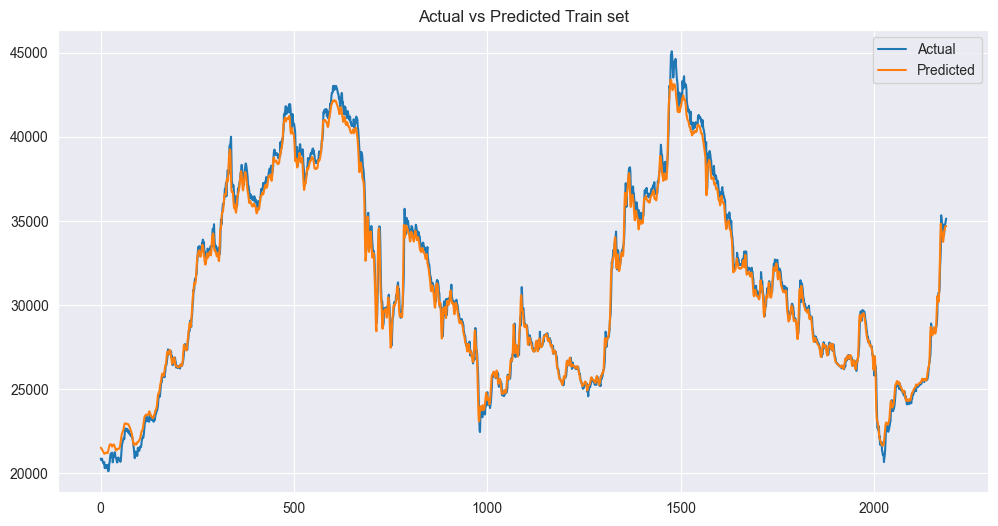

In [111]:
train_prediction=scaler.inverse_transform(Train_predictions)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_train_original[::-1], label='Actual')
plt.plot(train_prediction[::-1], label='Predicted')
plt.title('Actual vs Predicted Train set')
plt.legend()
plt.show()

In [112]:
Val_predictions = model.predict(X_val)

11/11 [==============================] - 0s 10ms/step


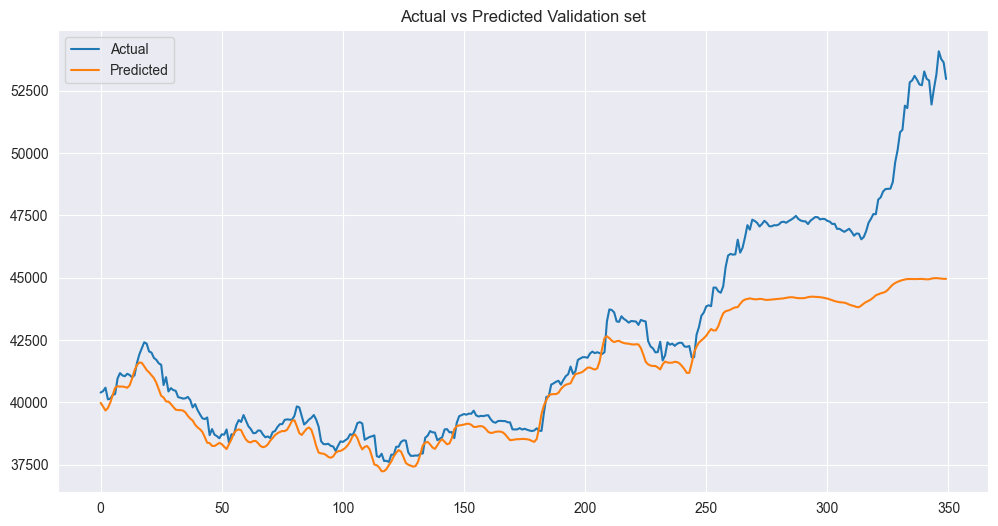

In [113]:
Val_prediction=scaler.inverse_transform(Val_predictions)
y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_val_original[::-1], label='Actual')
plt.plot(Val_prediction[::-1], label='Predicted')
plt.title('Actual vs Predicted Validation set')
plt.legend()
plt.show()

In [114]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 9ms/step


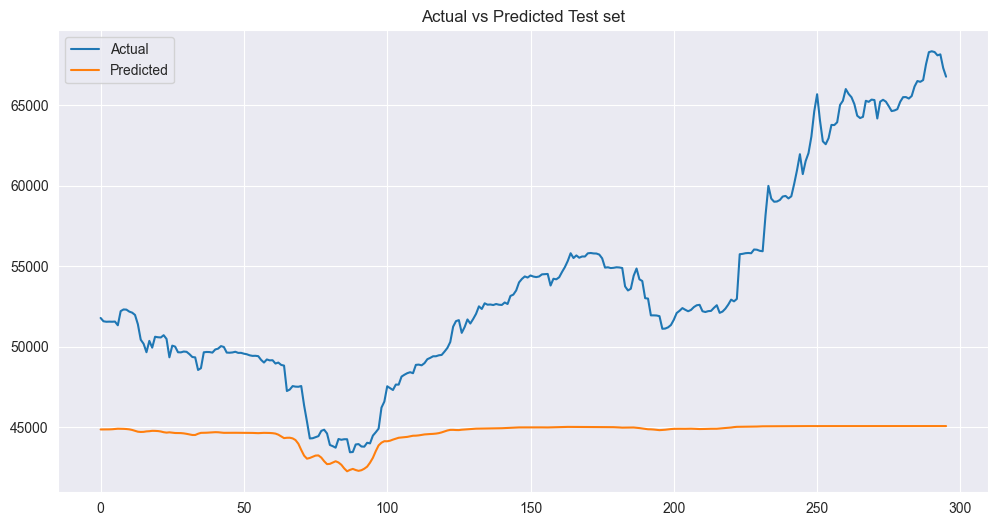

In [115]:
Test_prediction=scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_test_original[::-1], label='Actual')
plt.plot(Test_prediction[::-1], label='Predicted')
plt.title('Actual vs Predicted Test set')
plt.legend()
plt.show()

# Save the model

In [116]:
model.save('NSE_model_1.keras')

# Now only training with the last 1 year of the Dataset

In [117]:
df.head()

,Price
Date,
2023-10-12,67111.03
2023-10-11,67100.49
2023-10-10,66984.62
2023-10-09,67101.57
2023-10-06,66454.57


In [118]:
# Define the split index values
split_index1 = '2022-01-10'
split_index2 = '2023-05-27'

# Split the data into training and test sets
new_train = df[(df.index > split_index1) & (df.index < split_index2)]
new_test = df[df.index >= split_index2]


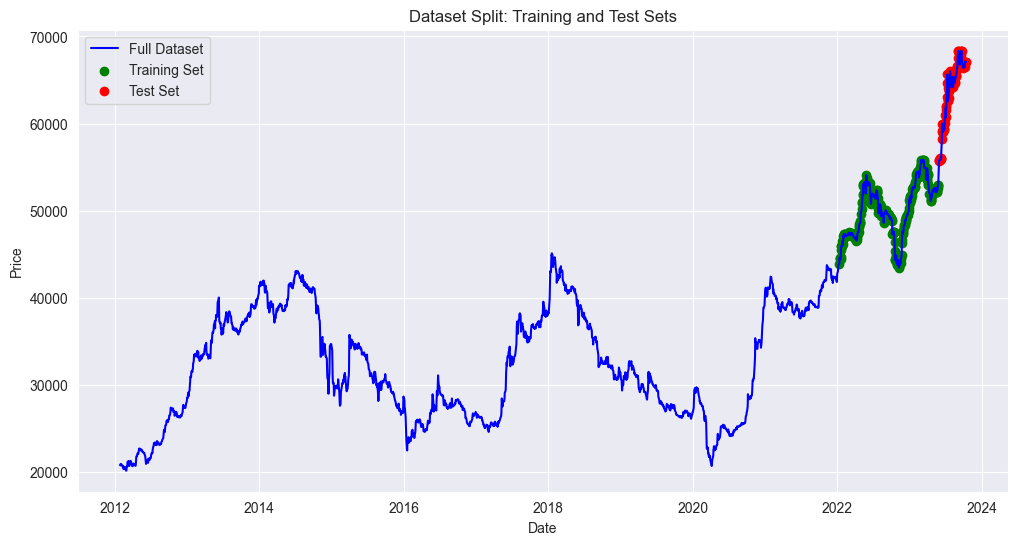

In [119]:
# Plot the dataset
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Full Dataset', color='blue')

# Plot the training and test sets based on the new split dates
plt.scatter(new_train.index, new_train['Price'], label='Training Set', color='green', marker='o')
plt.scatter(new_test.index, new_test['Price'], label='Test Set', color='red', marker='o')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dataset Split: Training and Test Sets')
plt.legend()

# Show the plot
plt.show()


In [120]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training, validation, and test data 
train_scaled_1 = scaler.fit_transform(new_train.values.reshape(-1, 1))

test_scaled_1 = scaler.transform(new_test.values.reshape(-1, 1))


In [121]:
time_step = 10
X_train, y_train = create_dataset(train_scaled_1, time_step)

X_test, y_test = create_dataset(test_scaled_1, time_step)

In [122]:


# Define the model architecture  
model_2 = Sequential()
model_2.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model_2.add(Dropout(0.1))
model_2.add(LSTM(units=100, return_sequences=True))
model_2.add(Dropout(0.1))
model_2.add(LSTM(units=100)) 
model_2.add(Dropout(0.1))
model_2.add(Dense(units=1, activation='linear', kernel_regularizer='l2'))


In [123]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_9 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 100)           80400     
                                                                 
 dropout_10 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [124]:


# Define the learning rate
learning_rate = 0.01

# Compile the model 
model_2.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [125]:
history_2 = model_2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1, callbacks=[early_stopping])


Epoch 1/100
11/11 [==============================] - 6s 135ms/step - loss: 1.2881 - mae: 0.6771 - val_loss: 0.4719 - val_mae: 0.6373
Epoch 2/100
11/11 [==============================] - 0s 30ms/step - loss: 0.0676 - mae: 0.1941 - val_loss: 0.5758 - val_mae: 0.7097
Epoch 3/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0404 - mae: 0.1432 - val_loss: 0.3164 - val_mae: 0.5036
Epoch 4/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0226 - mae: 0.0919 - val_loss: 0.1185 - val_mae: 0.2883
Epoch 5/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0195 - mae: 0.0786 - val_loss: 0.2563 - val_mae: 0.4495
Epoch 6/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0203 - mae: 0.0819 - val_loss: 0.0894 - val_mae: 0.2507
Epoch 7/100
11/11 [==============================] - 0s 34ms/step - loss: 0.0187 - mae: 0.0760 - val_loss: 0.1381 - val_mae: 0.3153
Epoch 8/100
11/11 [==============================] - 0s 34ms/step - loss: 0

In [126]:
Train_predictions = model_2.predict(X_train)

11/11 [==============================] - 1s 10ms/step


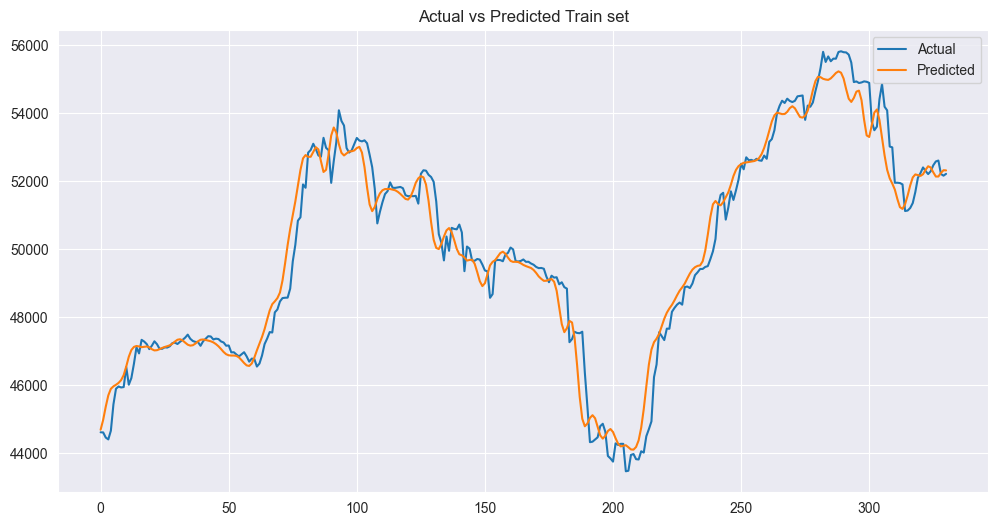

In [127]:
train_prediction=scaler.inverse_transform(Train_predictions)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_train_original[::-1], label='Actual')
plt.plot(train_prediction[::-1], label='Predicted')
plt.title('Actual vs Predicted Train set')
plt.legend()
plt.show()

In [128]:
test_predictions = model_2.predict(X_test)

3/3 [==============================] - 0s 9ms/step


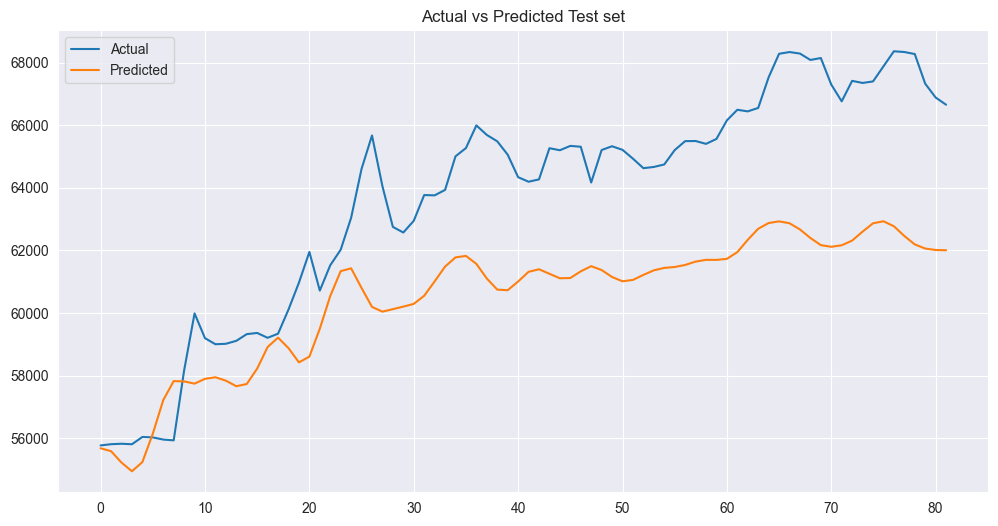

In [129]:
Test_prediction=scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_test_original[::-1], label='Actual')
plt.plot(Test_prediction[::-1], label='Predicted')
plt.title('Actual vs Predicted Test set')
plt.legend()
plt.show()

In [130]:
model_2.save('NSE_model_2.keras')